# Notebook-DAGitty


In [1]:
install.packages("dagitty")
install.packages("ggdag")
library(dagitty)
library(ggdag)

Installing package into 'D:/a/_temp/Library'
(as 'lib' is unspecified)



package 'dagitty' successfully unpacked and MD5 sums checked



The downloaded binary packages are in
	C:\Users\runneradmin\AppData\Local\Temp\RtmpUpxttS\downloaded_packages


Installing package into 'D:/a/_temp/Library'
(as 'lib' is unspecified)



package 'ggdag' successfully unpacked and MD5 sums checked



The downloaded binary packages are in
	C:\Users\runneradmin\AppData\Local\Temp\RtmpUpxttS\downloaded_packages



Attaching package: 'ggdag'




The following object is masked from 'package:stats':

    filter




## Graph Generation and Plotting 

The following DAG is due to Judea Pearl

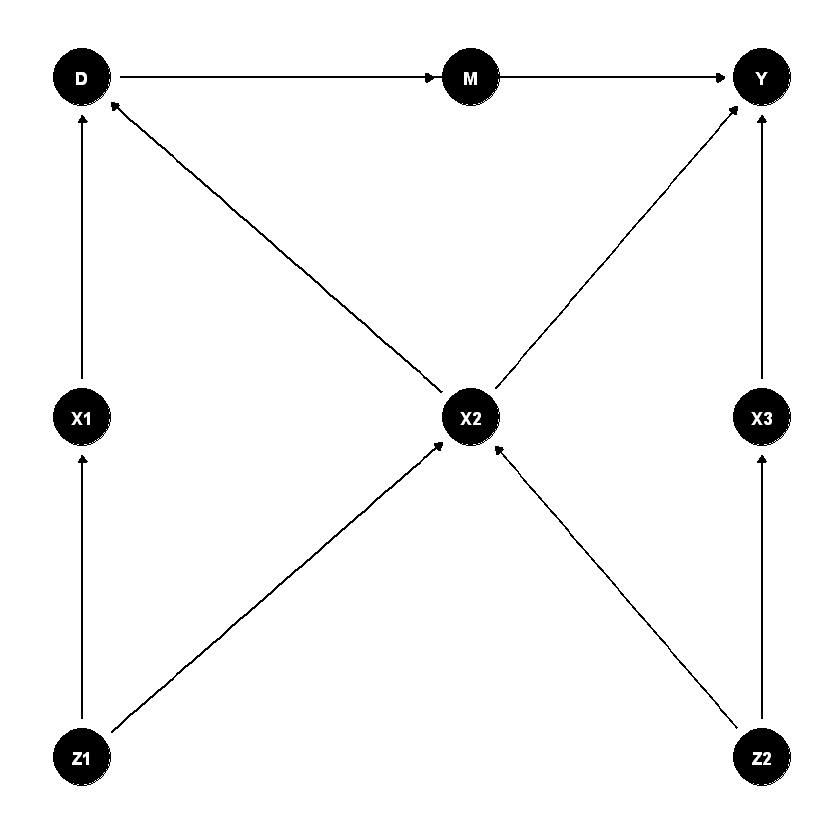

In [2]:
#generate a couple of DAGs and plot them

G = dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
D -> Y
X2 -> Y
X2 -> D
M->Y
D->M
}')


ggdag(G)+  theme_dag()

Report Relatives of X2

In [3]:
print(parents(G, "X2"))
print(children(G, "X2"))
print(ancestors(G, "X2"))
print(descendants(G, "X2"))

[1] "Z1" "Z2"


[1] "D" "Y"


[1] "X2" "Z2" "Z1"


[1] "X2" "Y"  "D"  "M" 


Find Paths Between D and Y



In [4]:
paths(G, "D", "Y")

$paths
[1] "D -> M -> Y"                         
[2] "D -> Y"                              
[3] "D <- X1 <- Z1 -> X2 -> Y"            
[4] "D <- X1 <- Z1 -> X2 <- Z2 -> X3 -> Y"
[5] "D <- X2 -> Y"                        
[6] "D <- X2 <- Z2 -> X3 -> Y"            

$open
[1]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE

List All Testable Implications of the Model

In [5]:
print( impliedConditionalIndependencies(G) )

D _||_ X3 | Z2
D _||_ X3 | X2, Z1
D _||_ X3 | X1, X2
D _||_ Z1 | X1, X2
D _||_ Z2 | X2, Z1
D _||_ Z2 | X1, X2
M _||_ X1 | D
M _||_ X2 | D
M _||_ X3 | Z2
M _||_ X3 | X2, Z1
M _||_ X3 | X1, X2
M _||_ X3 | D
M _||_ Z1 | X1, X2
M _||_ Z1 | D
M _||_ Z2 | X2, Z1
M _||_ Z2 | X1, X2
M _||_ Z2 | D
X1 _||_ X2 | Z1
X1 _||_ X3
X1 _||_ Y | D, X2, X3
X1 _||_ Y | D, X2, Z2
X1 _||_ Y | D, X2, Z1
X1 _||_ Z2
X2 _||_ X3 | Z2
X3 _||_ Z1
Y _||_ Z1 | X1, X2, Z2
Y _||_ Z1 | D, X2, Z2
Y _||_ Z1 | X1, X2, X3
Y _||_ Z1 | D, X2, X3
Y _||_ Z2 | X2, X3, Z1
Y _||_ Z2 | X1, X2, X3
Y _||_ Z2 | D, X2, X3
Z1 _||_ Z2


Identification by Backdoor: List minimal adjustment sets to identify causal effecs $D \to Y$

In [6]:
print( adjustmentSets( G, "D", "Y" ) )

{ X2, X3 }
{ X2, Z2 }
{ X2, Z1 }
{ X1, X2 }


Identification via SWIG and D-separation

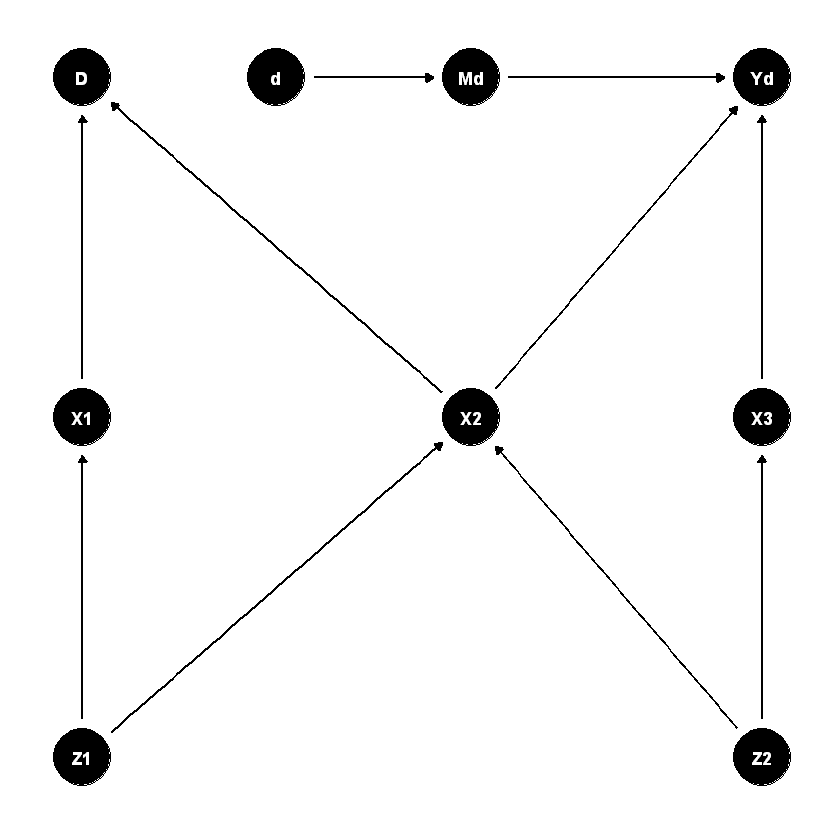

In [7]:
SWIG = dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Yd [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
d [pos="-1, 1.5"]
Md [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Yd
Z2 -> X2
X2 -> Yd
X2 -> D
X3-> Yd
Md-> Yd
d-> Md
}')

ggdag(SWIG)+  theme_dag()


Deduce Conditional Exogeneity or Ignorability by D-separation


In [8]:
print( impliedConditionalIndependencies(SWIG)[5:8] )


D _||_ Yd | X2, X3
D _||_ Yd | X2, Z2
D _||_ Yd | X2, Z1
D _||_ Yd | X1, X2


This coincides with the backdoor criterion for this graph.

Print All Average Effects Identifiable by Conditioning

In [9]:
for( n in names(G) ){
    for( m in children(G,n) ){
        a <- adjustmentSets( G, n, m )
        if( length(a) > 0 ){
            cat("The effect ",n,"->",m,
                " is identifiable by controlling for:\n",sep="")
            print( a, prefix=" * " )
        }
    }
}

The effect D->M is identifiable by controlling for:
 *  {}
The effect D->Y is identifiable by controlling for:
{ X2, X3 }
{ X2, Z2 }
{ X2, Z1 }
{ X1, X2 }
The effect M->Y is identifiable by controlling for:
{ D }
The effect X1->D is identifiable by controlling for:
{ X2 }
{ Z1 }
The effect X2->D is identifiable by controlling for:
{ X1 }
{ Z1 }
The effect X2->Y is identifiable by controlling for:
{ X1, X3 }
{ X1, Z2 }
{ X3, Z1 }
{ Z1, Z2 }
The effect X3->Y is identifiable by controlling for:
{ D, X2 }
{ X1, X2 }
{ X2, Z1 }
{ Z2 }
The effect Z1->X1 is identifiable by controlling for:
 *  {}
The effect Z1->X2 is identifiable by controlling for:
 *  {}
The effect Z2->X2 is identifiable by controlling for:
 *  {}
The effect Z2->X3 is identifiable by controlling for:
 *  {}


Equivalence Classes

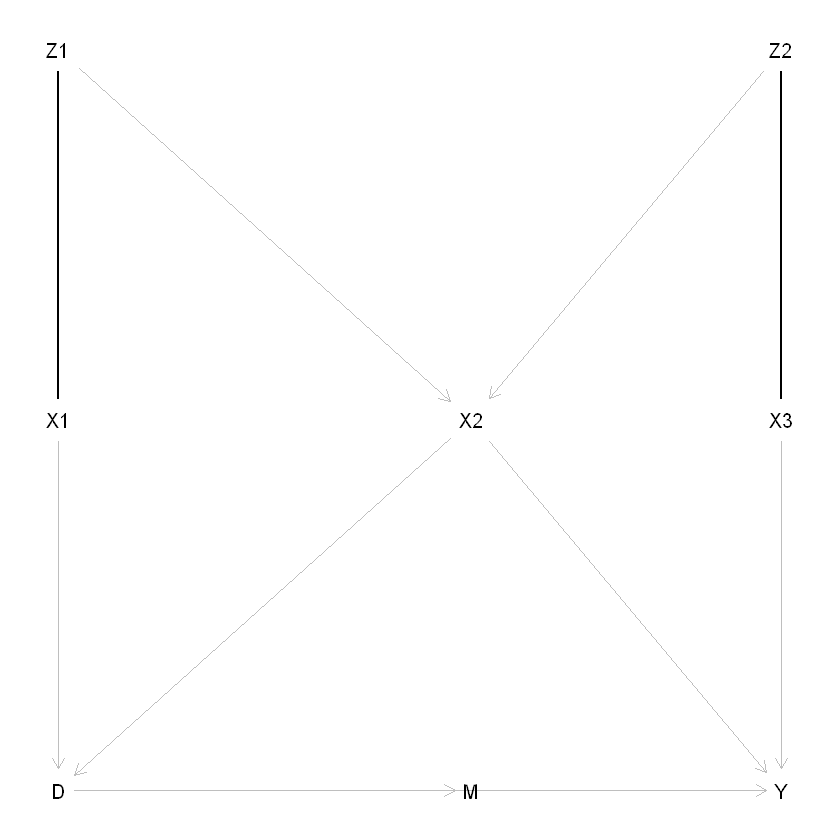

In [10]:
P=equivalenceClass(G)
plot(P)
#equivalentDAGs(G,10)

Next Consider the elemntary Triangular Model:

$$
D \to Y, \quad X \to (D,Y).
$$

This model has not testable implications and is Markov-equivalent to any other DAG difined on names $(X, D, Y)$.

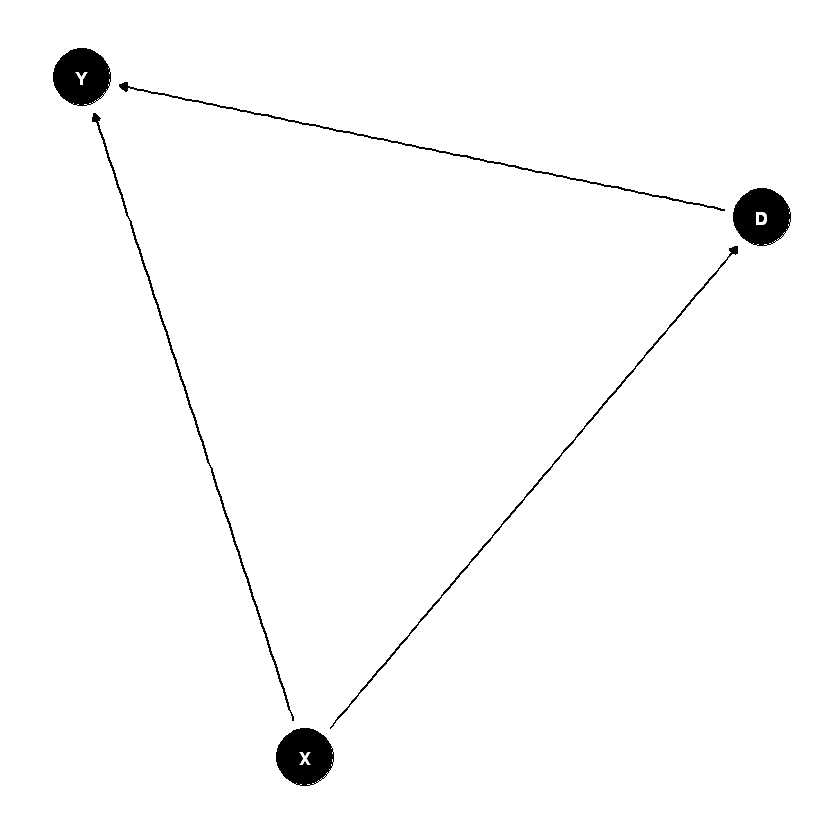

In [11]:
G3<- dagitty('dag{
D -> Y
X -> D
X -> Y
}
')

ggdag(G3)+  theme_dag()

print(impliedConditionalIndependencies(G3))



Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



[[1]]
dag {
D
X
Y
D -> Y
X -> D
X -> Y
}

[[2]]
dag {
D
X
Y
D -> X
D -> Y
X -> Y
}

[[3]]
dag {
D
X
Y
D -> X
D -> Y
Y -> X
}

[[4]]
dag {
D
X
Y
X -> D
X -> Y
Y -> D
}

[[5]]
dag {
D
X
Y
X -> D
Y -> D
Y -> X
}

[[6]]
dag {
D
X
Y
D -> X
Y -> D
Y -> X
}


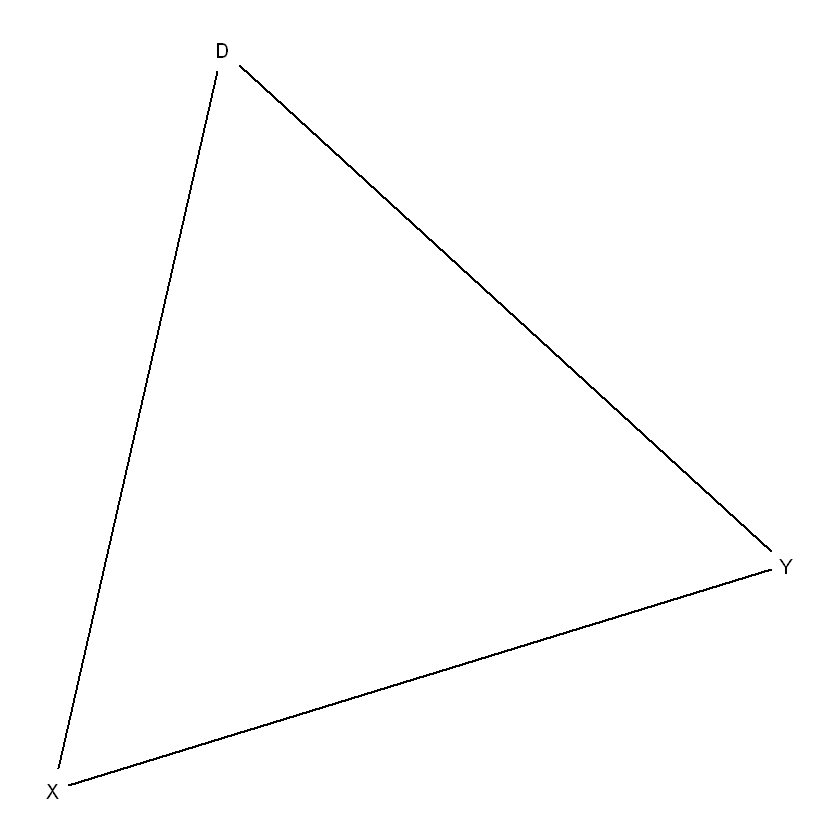

In [12]:
P=equivalenceClass(G3)
plot(P)
equivalentDAGs(G3,10)



## Example of Testing DAG Validity

Next we simulate the data from a Linear SEM associated to DAG G, and perform a test of conditional independence restrictions, exploting linearity. 


There are many other options for nonlinear models and discrete categorical variabales. Type help(localTests). 

In [13]:
set.seed(1)
x <- simulateSEM(G)
head(x)
#cov(x)
localTests(G, data = x, type = c("cis"))



,D,M,X1,X2,X3,Y,Z1,Z2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8474441,-0.58585206,-0.7012941,0.5498830,0.19655958,0.9116779,0.7263907,-0.89149285
2,-1.6262148,2.00395356,-1.8377283,-0.7095460,-0.50443494,-0.2215374,-0.8513481,-0.02621535
3,0.1614541,1.01051345,-1.4470186,0.3221004,-0.02075701,-0.2469239,-0.8426767,0.62002207
4,2.3009195,-2.82279254,-0.3189441,-1.8295047,-0.70087536,-1.5760471,-0.9636417,1.54962139
5,1.0838933,0.06353048,0.9142856,-0.9856389,0.55416859,0.3526000,-0.1109774,1.63705061
6,-1.7508287,-0.17593255,-1.5993489,-0.1865325,0.01467747,0.1302770,1.5156057,-1.11707145


,estimate,p.value,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
D _||_ X3 | Z2,0.035622986,0.42737161,-0.052319125,0.12301869
"D _||_ X3 | X2, Z1",0.016471580,0.71399002,-0.071498675,0.10418826
"D _||_ X3 | X1, X2",0.039926831,0.37411682,-0.048108613,0.12734896
"D _||_ Z1 | X1, X2",-0.067806530,0.13080922,-0.154757149,0.02018035
"D _||_ Z2 | X2, Z1",0.021481285,0.63264882,-0.066510991,0.10914297
"D _||_ Z2 | X1, X2",0.010402617,0.81696370,-0.077535091,0.09818014
M _||_ X1 | D,0.003036436,0.94608428,-0.084764936,0.09079114
M _||_ X2 | D,-0.020310731,0.65097821,-0.107897832,0.06758835
M _||_ X3 | Z2,0.035998270,0.42251471,-0.051944379,0.12338879


Next we replaced $D$ by $\bar D$ generated differently:

$$
\bar D= (D + Y)/2
$$

So basically $\bar D$ is an average of $D$ and $Y$ generated by $D$.  We then test if the resulting collection of random variables satisifes conditional indepdendence restrictions, exploiting linearity.  We end up rejectiong these restrictions and thefore the validity of this model for the data generated in this way.  This makes sense, because the new data no longer obeys the previous DAG structure.



In [14]:
x.R = x
x.R$D = (x$D+ x$Y)/2

localTests(G, data = x.R, type = c("cis"))



,estimate,p.value,2.5%,97.5%
,<dbl>,<dbl>,<dbl>,<dbl>
D _||_ X3 | Z2,0.495232256,1.157134e-33,0.42697450,0.56288383
"D _||_ X3 | X2, Z1",0.518071072,2.604425e-37,0.45206603,0.58462121
"D _||_ X3 | X1, X2",0.575983100,2.622904e-48,0.51681228,0.63998753
"D _||_ Z1 | X1, X2",-0.005755708,8.981032e-01,-0.09357551,0.08215274
"D _||_ Z2 | X2, Z1",-0.143108556,1.346074e-03,-0.22814881,-0.05594543
"D _||_ Z2 | X1, X2",-0.163192808,2.487265e-04,-0.24757363,-0.07642216
M _||_ X1 | D,-0.129098627,3.836547e-03,-0.21447770,-0.04179376
M _||_ X2 | D,0.101698217,2.303920e-02,0.01404511,0.18781599
M _||_ X3 | Z2,0.035998270,4.225147e-01,-0.05194438,0.12338879
